# Scratch dans un notebook

Il existe une version javascript de Scratch : [snap](http://snap.berkeley.edu/snapsource/snap.html). On peut récupérer les sources soit depuis le site, soit depuis github [jmoenig/Snap--Build-Your-Own-Blocks](https://github.com/jmoenig/Snap--Build-Your-Own-Blocks) (il y a un peu plus d'images, de personnages). J'ai recopié les sources dans le module [code_beatrix](https://pypi.python.org/pypi/code_beatrix/0.5.59). Voici un exemple qui montre comment faire apparaître une interface Snap depuis un notebook Jupyter. Tout d'abord, il faut recopier le code javascript dans un répertoire de Jupyter afin que le serveur local puisse les trouver.

In [1]:
import code_beatrix.jsscripts.snap
%load_ext code_beatrix

In [2]:
import os, glob
js_path = os.path.dirname(code_beatrix.jsscripts.snap.__file__)
files = [ os.path.split(_)[-1] for _ in glob.glob(js_path + "/*.js") ]
print(",".join(files))
path = "/static/snap/"
js_libs = [path + _ for _ in files ]

blocks.js,byob.js,cloud.js,FileSaver.min.js,gui.js,lang-ar.js,lang-bg.js,lang-bn.js,lang-ca.js,lang-cs.js,lang-de.js,lang-dk.js,lang-el.js,lang-eo.js,lang-es.js,lang-et.js,lang-fi.js,lang-fr.js,lang-gl.js,lang-hr.js,lang-hu.js,lang-ia.js,lang-id.js,lang-it.js,lang-ja.js,lang-ja_HIRA.js,lang-kn.js,lang-ko.js,lang-ml.js,lang-nl.js,lang-no.js,lang-pl.js,lang-pt.js,lang-pt_BR.js,lang-ro.js,lang-ru.js,lang-si.js,lang-sv.js,lang-ta.js,lang-te.js,lang-tr.js,lang-zh_CN.js,lang-zh_TW.js,lists.js,locale.js,morphic.js,objects.js,paint.js,sha512.js,store.js,symbols.js,tables.js,threads.js,widgets.js,xml.js,ypr.js


In [3]:
import notebook
print("fichier à récupérer dans ", "..." + js_path[-40:])
print("fichier à copier à ", os.path.join(os.path.dirname(notebook.__file__),"static", "snap"))

fichier à récupérer dans  ..._beatrix\src\code_beatrix\jsscripts\snap
fichier à copier à  c:\python370_x64\lib\site-packages\notebook\html\static\snap


In [4]:
from code_beatrix.jsscripts import copy_jstool2notebook
copy_jstool2notebook("snap")

[]

Si le résultat est vide, cela signifie que les fichiers ont déjà été copiés. On veut obtenir ceci :

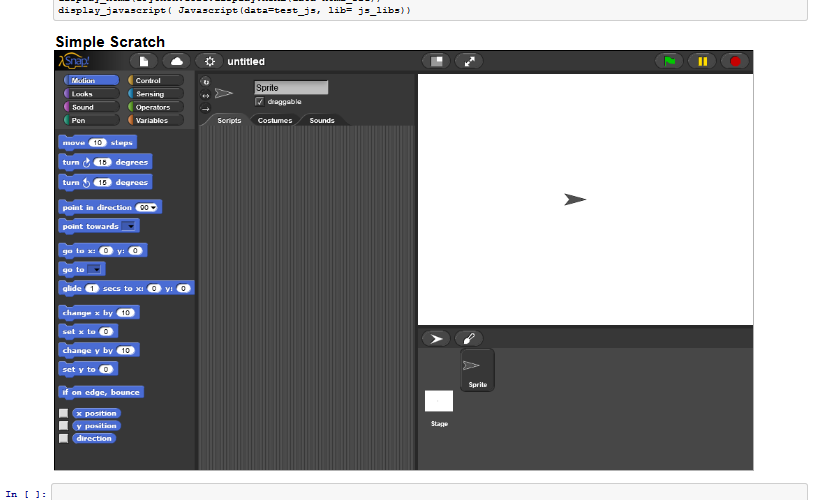

In [5]:
from pyquickhelper.helpgen import NbImage
NbImage("screenshot_scratch_nb.png", width="75%")

On exécute le code suivant pour faire apparaître la fenêtre. Dernière précision, sauver le notebook ne sauve pas l'animation Scratch, il faut le faire soi-même (le résultat ne passe pas très dans la documentation encore, problème de frame et de javascript).

In [6]:
html_src = """
    <h2>Simple Scratch</h2>
    <div id="scratch1-div">
    <iframe src="/static/snap/snap.html" width="1000" height="600" scrolling="auto">
    </iframe>
    </div>
    """
test_js = """ """
 
import IPython
from IPython.core.display import display_html, display_javascript, Javascript
display_html(IPython.core.display.HTML(data=html_src))
display_javascript( Javascript(data=test_js, lib= js_libs))

Simple Scratch

Le javascript ne passe pas toujours très bien dans la documentation et celui-ci n'est pas très léger.